# 1. FIND- S 

In [306]:
import numpy as np
import pandas as pd

sky=['sunny','sunny','rainy','sunny']
airtemp=['warm','warm','cold','warm']
hum=['normal','high','high','high']
wind=['strong','strong','strong','strong']
water=['warm','warm','warm','cool']
fc=['same','same','change','change']
esport=['yes','yes','no','yes']

In [307]:
data={"Sky":sky,"Airtemp":airtemp,'Humidity':hum,'Wind':wind,'Water':water,'Forecast':fc,'Enjoysport':esport}

In [308]:
df=pd.DataFrame(data)
df.to_csv('sport.csv')

In [309]:
#initial value of hypothesis
h=['0']*6
for instance in df.values:
    if instance[-1]=='yes':
        for j in range(len(h)):
            if (h[j]=='0' or h[j]==instance[j]):
                h[j]=instance[j]
            elif h[j]!=instance[j]:
                h[j]='?'
print("The maximally hypothesis  is:",h)

The maximally hypothesis  is: ['sunny', 'warm', '?', 'strong', '?', '?']


# 2. Candidate Elimination Algorithm

In [1]:
import random
import csv

In [22]:
with open('EnjoySportCE.csv')  as csvFile:
        examples = [tuple(line) for line in csv.reader(csvFile)]
examples

[('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Y'),
 ('Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Y'),
 ('Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'N'),
 ('Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Y')]

In [3]:
def g_0(n):
    return ("?",)*n

def s_0(n):
    return ('0',)*n

In [4]:
domains=[['Rainy', 'Sunny'],
 ['Cold', 'Warm'],
 ['High', 'Normal'],
 ['Strong'],
 ['Cool', 'Warm'],
 ['Change', 'Same'],
 ['N', 'Y']]

In [5]:
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)

In [6]:
# min_generalizations
def fulfills(example, hypothesis):
    ### the implementation is the same as for hypotheses:
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not fulfills(x[i:i+1], h[i:i+1]):
            h_new[i] = '?' if h[i] != '0' else x[i]
    return [tuple(h_new)]

In [316]:
def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results

In [317]:
def candidate_elimination(examples):
   #domains = get_domains(examples)[:-1]
    domains=[['Rainy', 'Sunny'],
 ['Cold', 'Warm'],
 ['High', 'Normal'],
 ['Strong'],
 ['Cool', 'Warm'],
 ['Change', 'Same'],
 ['N', 'Y']][:-1]
    G = set([g_0(len(domains))])
    S = set([s_0(len(domains))])
    i=0
   
    print("\n G[{0}]:".format(i),G)
    print("\n S[{0}]:".format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]  # Splitting data into attributes and decisions
                        
        if cx=='Y': # x is positive example
            G = {g for g in G if fulfills(x, g)}
            S = generalize_S(x, G, S)
        else: # x is negative example
            S = {s for s in S if not fulfills(x, s)}
            G = specialize_G(x, domains, G, S)
        print("\n G[{0}]:".format(i),G)
        print("\n S[{0}]:".format(i),S)
    return

In [318]:
def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not fulfills(x, s):
            S.remove(s)
            Splus = min_generalizations(s, x)
            ## keep only generalizations that have a counterpart in G
            S.update([h for h in Splus if any([more_general(g,h) 
                                               for g in G])])
            ## remove hypotheses less specific than any other in S
            S.difference_update([h for h in S if 
                                 any([more_general(h, h1) 
                                      for h1 in S if h != h1])])
    return S

In [319]:
def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if fulfills(x, g):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            ## keep only specializations that have a conuterpart in S
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            ## remove hypotheses less general than any other in G
            G.difference_update([h for h in G if 
                                 any([more_general(g1, h) 
                                      for g1 in G if h != g1])])
    return G

In [320]:
candidate_elimination(examples)



 G[0]: {('?', '?', '?', '?', '?', '?')}

 S[0]: {('0', '0', '0', '0', '0', '0')}

 G[1]: {('?', '?', '?', '?', '?', '?')}

 S[1]: {('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same')}

 G[2]: {('?', '?', '?', '?', '?', '?')}

 S[2]: {('Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same')}

 G[3]: {('?', '?', '?', '?', '?', 'Same'), ('?', 'Warm', '?', '?', '?', '?'), ('Sunny', '?', '?', '?', '?', '?')}

 S[3]: {('Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same')}

 G[4]: {('?', 'Warm', '?', '?', '?', '?'), ('Sunny', '?', '?', '?', '?', '?')}

 S[4]: {('Sunny', 'Warm', '?', 'Strong', '?', '?')}


# 3. Decision Tree

In [321]:
sky=['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain']
airtemp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
hum=['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High']
wind=['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong']
esport=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [322]:
data={"Outlook":sky,"Temperature":airtemp,'Humidity':hum,'Wind':wind,'PlayTennis':esport}

In [323]:
df1=pd.DataFrame(data)
df1

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [324]:
df1.to_csv('sport1.csv')

In [325]:
import pandas as pd
from pandas import DataFrame 
df_tennis = DataFrame.from_csv('sport1.csv')
print("\n Given Play Tennis Data Set:\n\n", df_tennis)


 Given Play Tennis Data Set:

      Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [326]:
df_tennis.keys()[0]

'Outlook'

In [327]:
def entropy(probs):  
    import math
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropy_of_list(a_list):  
    from collections import Counter
    cnt = Counter(x for x in a_list)   
    num_instances = len(a_list)*1.0   
    probs = [x / num_instances for x in cnt.values()]  
    return entropy(probs) 

def information_gain(df, split_attribute_name, target_attribute_name, trace=0):
    df_split = df.groupby(split_attribute_name)
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name]
    df_agg_ent.columns = ['Entropy', 'PropObservations']
    new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['PropObservations'] )
    old_entropy = entropy_of_list(df[target_attribute_name])
    return old_entropy - new_entropy

def id3(df, target_attribute_name, attribute_names, default_class=None):
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute_name])# class of YES /NO
    if len(cnt) == 1:
        return next(iter(cnt))  # next input data set, or raises StopIteration when EOF is hit.
    elif df.empty or (not attribute_names):
        return default_class  
    else:      
        default_class = max(cnt.keys()) 
        gainz = [information_gain(df, attr, target_attribute_name) for attr in attribute_names] 
        print("Gain=",gainz)
        index_of_max = gainz.index(max(gainz)) 
        best_attr = attribute_names[index_of_max]
        print("Best Attribute:",best_attr)
        tree = {best_attr:{}} 
        remaining_attribute_names = [i for i in attribute_names if i != best_attr]
        
        
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,
                        target_attribute_name,
                        remaining_attribute_names,
                        default_class)
            tree[best_attr][attr_val] = subtree
        return tree


attribute_names = list(df_tennis.columns)
print("List of Attributes:", attribute_names) 
attribute_names.remove('PlayTennis')  
print("Predicting Attributes:", attribute_names)

# Run Algorithm:
from pprint import pprint
tree = id3(df_tennis,'PlayTennis',attribute_names)
print("\n\nThe Resultant Decision Tree is :\n")
pprint(tree)

List of Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']
Predicting Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind']
Gain= [0.2467498197744391, 0.029222565658954647, 0.15183550136234136, 0.04812703040826927]
Best Attribute: Outlook
Gain= [0.01997309402197489, 0.01997309402197489, 0.9709505944546686]
Best Attribute: Wind
Gain= [0.5709505944546686, 0.9709505944546686, 0.01997309402197489]
Best Attribute: Humidity


The Resultant Decision Tree is :

{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


# 4. K - NN 

In [328]:
import numpy as np
import pandas as pd

X=np.array( [[7,7],
    [7,4],
    [3,4],
    [1,4]])

In [329]:
y=np.array(["BAD","BAD","GOOD","GOOD"])

In [330]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state =0)

In [331]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [332]:
y_pred = knn.predict(np.array([[1,4]]))

In [333]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [1, 0]], dtype=int64)

In [334]:
print (knn.predict([[1,4]]))

['BAD']


# 5. Naive Bayes Classifier

In [335]:
import numpy as np

import pandas as pd

from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


In [336]:
sky=['sunny','sunny','overcast','rain','rain','rain','overcast','sunny','sunny','rain','sunny','overcast','overcast','rain']
airtemp=['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']
hum=['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high']
wind=['weak','strong','weak','weak','weak','strong','strong','weak','weak','weak','strong','strong','weak','strong']
esport=['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [337]:
data={"Outlook":sky,"Temperature":airtemp,'Humidity':hum,'Wind':wind,'Play Tennis':esport}

In [338]:

play_tennis=pd.DataFrame(data)

In [339]:

play_tennis.head(5)


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes


In [340]:
number = LabelEncoder()

play_tennis['Outlook'] = number.fit_transform(play_tennis['Outlook'])

play_tennis['Temperature'] = number.fit_transform(play_tennis['Temperature'])

play_tennis['Humidity'] = number.fit_transform(play_tennis['Humidity'])

play_tennis['Wind'] = number.fit_transform(play_tennis['Wind'])

play_tennis['Play Tennis'] = number.fit_transform(play_tennis['Play Tennis'])

play_tennis[['Outlook','Temperature','Humidity','Wind','Play Tennis']]

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [341]:
X=play_tennis.iloc[:,[0,1,2,3]].values
y=play_tennis.iloc[:,4].values


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

In [343]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [345]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


In [346]:
accuracy

0.5

In [347]:
print (model.predict([[2,0,0,0]]))


[0]


In [155]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [156]:
df2=pd.read_csv('Social_Network_Ads.csv')

In [157]:
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values

In [158]:
from sklearn.model_selection import train_test_split #train_test_split is a method
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [159]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 6.

In [249]:

from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [250]:
y_pred=classifier.predict(X_test)

In [251]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [252]:
print('Accuracy:',accuracy_score(y_test,y_pred)*100)


Accuracy: 91.0


# 18.

In [275]:
tp = cm[0,0]
fn = cm[0,1]
fp=cm[1,0]
tn=cm[1,1]
total = len(X_test)
actualY = tp+fn
actualN = tn+ fp

In [276]:
accuracy = (tp+tn)/total
print(accuracy)

0.91


In [277]:
misclassification = 1 - accuracy
print(misclassification)

0.08999999999999997


In [278]:
sensitivity= tp/actualY
print(sensitivity)

0.9117647058823529


In [279]:
specificity=tn/actualN
print(specificity)

0.90625


In [282]:
typ1err=fp/actualN
print(typ1err)

0.09375


In [283]:
typ2err=fn/actualY
print(typ2err)

0.08823529411764706


# 7.

In [206]:
df2=pd.read_csv('Social_Network_Ads.csv')
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
from sklearn.model_selection import train_test_split #train_test_split is a method
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [207]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [208]:
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 90.0


# 8.

In [224]:
df2=pd.read_csv('Social_Network_Ads.csv')
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [225]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[68  0]
 [32  0]]


In [226]:
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 68.0


# 9.

In [212]:
df2=pd.read_csv('Social_Network_Ads.csv')
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
from sklearn.model_selection import train_test_split #train_test_split is a method
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)#fitting the knn to the training set
from sklearn.neighbors import KNeighborsClassifier
classifer=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
classifer.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [213]:
#predicting the test set results
y_pred=classifer.predict(X_test)
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[59,  9],
       [ 8, 24]], dtype=int64)

In [214]:
accuracy = accuracy_score(y_test,y_pred) * 100
print('KNeighborsClassifier | ' + str(round(accuracy, 2)) + ' %.')

KNeighborsClassifier | 83.0 %.


# 10.

In [188]:
df2=pd.read_csv('wine.csv')
X=df2.iloc[:,1:].values
y=df2.iloc[:,0].values
from sklearn.model_selection import train_test_split #train_test_split is a method
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [189]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [190]:
# from sklearn.decomposition import PCA as p
# ppp = p(n_components=0)
# X_train = ppp.fit_transform(X_train)
# X_test = ppp.transform(X_test)



In [191]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
y_pred=classifer.predict(X_test)

In [193]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 6 10  0]
 [ 4 14  3]
 [ 0  0  8]]


In [194]:
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 62.22222222222222


# 11.

In [215]:
df2=pd.read_csv('Social_Network_Ads.csv')
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
from sklearn.model_selection import train_test_split #train_test_split is a method
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [216]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [217]:
pred = lr.predict(X_test)


In [218]:
from sklearn.metrics import confusion_matrix as c
cm = c(y_test,pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [219]:

accuracy = accuracy_score(y_test,pred) * 100
print('LogisticRegression | ' + str(round(accuracy, 2)) + ' %.')

LogisticRegression | 89.0 %.


# 12.

In [220]:
df2=pd.read_csv('Social_Network_Ads.csv')
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
from sklearn.model_selection import train_test_split #train_test_split is a method
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction) * 100
print('Random Forest accuracy | ' + str(round(accuracy, 2)) + ' %.')

Random Forest accuracy | 90.0 %.


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 13.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LR: 0.637500 (0.243734)
LDA: 0.822500 (0.113716)
KNN: 0.762500 (0.129542)
CART: 0.855000 (0.092060)
NB: 0.857500 (0.098139)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

SVM: 0.667500 (0.213029)


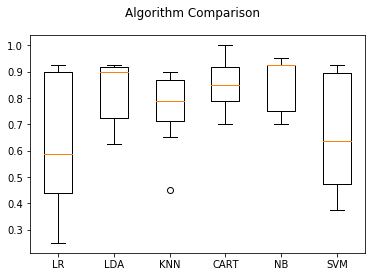

In [223]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
df2=pd.read_csv('Social_Network_Ads.csv')
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 14


In [398]:
import pandas as pd
import numpy as np

In [400]:
df=pd.read_csv('sport1.csv')
df

,Unnamed: 0,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Sunny,Hot,High,Weak,No
1,1,Sunny,Hot,High,Strong,No
2,2,Overcast,Hot,High,Weak,Yes
3,3,Rain,Mild,High,Weak,Yes
4,4,Rain,Cool,Normal,Weak,Yes
5,5,Rain,Cool,Normal,Strong,No
6,6,Overcast,Cool,Normal,Strong,Yes
7,7,Sunny,Mild,High,Weak,No
8,8,Sunny,Cool,Normal,Weak,Yes
9,9,Rain,Mild,Normal,Weak,Yes


In [401]:
def entropy(probs):  
    import math
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropy_of_list(a_list):  
    from collections import Counter
    cnt = Counter(x for x in a_list)   
    num_instances = len(a_list)*1.0   
    probs = [x / num_instances for x in cnt.values()]  
    return entropy(probs) 

def information_gain(df, split_attribute_name, target_attribute_name, trace=0):
    df_split = df.groupby(split_attribute_name)
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name]
    df_agg_ent.columns = ['Entropy', 'PropObservations']
    new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['PropObservations'] )
    old_entropy = entropy_of_list(df[target_attribute_name])
    return old_entropy - new_entropy

In [402]:
print(information_gain(df,'Temperature','PlayTennis'))
print(entropy_of_list(df['PlayTennis']))

0.029222565658954647
0.9402859586706309


# 15.

In [229]:
import pandas as pd
from pandas import DataFrame 
df= DataFrame.from_csv('sport1.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [231]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [236]:
df.columns[:-1]
len(df[df['PlayTennis']=='yes'])
len(df)

14

In [246]:
def prob(l,a,k):
    n=len(df[df[l]==a][df['PlayTennis']==k])
    k=len(df[df[l]==a])
    return n/k

In [247]:
def naive_bayes(s,c,h,m):
    yc=len(df[df['PlayTennis']=='Yes'])
    nc=len(df[df['PlayTennis']=='No'])
    n=len(df)
    i,j,k,l=df.columns[:-1]
    vsb=(yc/n)*prob(i,s,'Yes')*prob(j,c,'Yes')*prob(k,h,'Yes')*prob(l,m,'Yes')
    vnb=(yc/n)*prob(i,s,'No')*prob(j,c,'No')*prob(k,h,'No')*prob(l,m,'No')
    print(vsb)
    print(vnb)
    if vsb>vnb:
        print(vsb)
        print("is going to play")
    else:
        print(vnb)
        print("not going")
naive_bayes('Sunny','Cool','High','Strong')

0.0413265306122449
0.027551020408163266
0.0413265306122449


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to matc

In [248]:
i,j,k,l=df.columns[:-1]

In [242]:
print(i)

Outlook


# 16.

In [403]:
import math
x = (5, 6)
y = (8, 9)
distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
print("Euclidean distance from x to y: ",distance)


Euclidean distance from x to y:  4.242640687119285


# 17.

In [271]:
A = np.array([[9,2,3],[2,3,4],[9,5,2]])

w,v = np.linalg.eig(A)
print('eigen vector',v)
print('eigen value',w)

eigen vector [[-0.63566346 -0.4386726  -0.11958179]
 [-0.381541    0.85683887 -0.54787598]
 [-0.6710875   0.27091236  0.82796867]]
eigen value [13.36763265  3.24077366 -2.60840631]


In [272]:
np.cov(A)

array([[14.33333333, -3.        , 11.16666667],
       [-3.        ,  1.        , -3.5       ],
       [11.16666667, -3.5       , 12.33333333]])

In [273]:
A=np.array([1,5,4,7,9,6])
B=np.array([2,9,7,4,1,6])
a=A.mean()
b=B.mean()
covAB=np.sum((A-a)*(B-b))
covBA=covAB
covAA=np.sum((A-a)**2)
covBB=np.sum((B-b)**2)

In [274]:
np.array([[covAA,covAB],[covBA,covBB]])

array([[37.33333333, -6.66666667],
       [-6.66666667, 46.83333333]])